# Sales Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Merging all the files into a single csv

In [2]:
path= './Sales_Data'

files= [file for file in os.listdir('./Sales_Data')]

combine_df = pd.DataFrame()

for file in files:
    df=pd.read_csv('./Sales_Data/' + file)
    combine_df=pd.concat([combine_df,df])
    
combine_df.to_csv('combine_df.csv',index=False)

In [3]:
new_df=pd.read_csv('combine_df.csv')
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
new_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

### Cleaning the data

#### Drop rows containing NAN

In [5]:
df_nan= new_df[new_df.isna().any(axis=1)]
df_nan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
new_df.dropna(how='any',inplace=True)
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
new_df = new_df[new_df['Order Date'].str[0:2] != 'Or']
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Changing the datatype of columns 

In [8]:
new_df['Quantity Ordered'] = new_df['Quantity Ordered'].astype('int32')
new_df['Price Each'] = new_df['Price Each'].astype('float')

### Augment data with new column

#### Adding the column month

In [9]:
new_df['Month']= new_df['Order Date'].str[0:2]
new_df['Month']=new_df['Month'].astype('int32')

In [10]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Adding the column Sales

In [11]:
new_df['Sales'] = new_df['Quantity Ordered'] * new_df['Price Each']
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Adding the column City

In [12]:
new_df['City']=new_df['Purchase Address'].apply(lambda x: x.split(',')[1].strip() + ' (' +  x.split(',')[2].strip().split(' ')[0] + ')')

new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Adding the column Hour

In [13]:
new_df['Order Date']=pd.to_datetime(new_df['Order Date'])

In [14]:
new_df['Hour'] = new_df['Order Date'].dt.hour
new_df['Minute']= new_df['Order Date'].dt.minute

new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


# Data Exploration

<b> Question 1: <b> What was the best month for sales? How much was earned that month?

In [15]:
month_data = new_df.groupby('Month').sum()
month_data

,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
1,10903,1811768.38,1822256.73,139485,282440
2,13449,2188884.72,2202022.42,172669,354885
3,17005,2791207.83,2807100.38,218969,447559
4,20558,3367671.02,3390670.24,262259,544186
5,18667,3135125.13,3152606.75,238780,487899
6,15253,2562025.61,2577802.26,195528,402436
7,16072,2632539.56,2647775.76,206169,417349
8,13448,2230345.42,2244467.88,172289,353857
9,13109,2084992.09,2097560.13,168513,341698


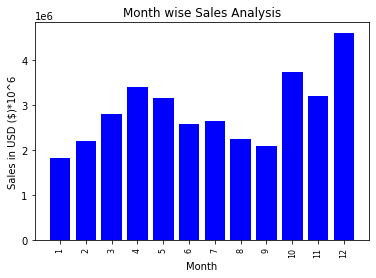

In [16]:
# month_data.columns
months= range(1,13)

plt.bar(months,month_data['Sales'],color='Blue')
plt.xticks(months,rotation='vertical',size=8)
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)*10^6')
plt.title('Month wise Sales Analysis')
plt.show()


#### Question 2: What city sold the most product?

In [17]:
city_df = new_df.groupby('City').sum()
city_df

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58,214264,442932
Austin (TX),11153,1809873.61,69829,1819581.75,141946,289060
Boston (MA),22528,3637409.77,141112,3661642.01,288225,590442
Dallas (TX),16730,2752627.82,104620,2767975.40,214390,435155
Los Angeles (CA),33289,5421435.23,208325,5452570.80,427444,866638
New York City (NY),27932,4635370.83,175741,4664317.43,357696,733598
Portland (ME),2750,447189.25,17144,449758.27,35211,72856
Portland (OR),11303,1860558.22,70621,1870732.34,144421,295533
San Francisco (CA),50239,8211461.74,315520,8262203.91,643265,1319477


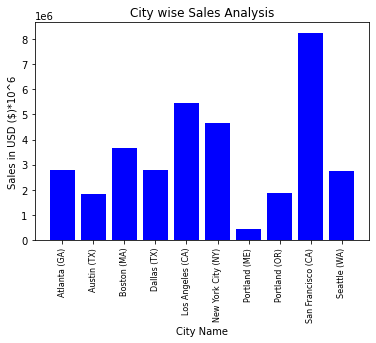

In [18]:
cities = [city for city , df in new_df.groupby(['City'])]

plt.bar(cities,city_df['Sales'],color='Blue')
plt.xticks(cities,rotation='vertical',size=8)
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)*10^6')
plt.title('City wise Sales Analysis')
plt.show()


#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
###### Conclusion: By drawing the output graph, the best time to display the advertisement is after 11 as the first peak is around 12 and after 6 in the                                 evening as the second peaks at around 7

In [19]:
time_freq = new_df['Hour'].value_counts().sort_index()
time_freq

0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Hour, dtype: int64

Text(0.5, 1.0, 'Time vs Frequency of Orders')

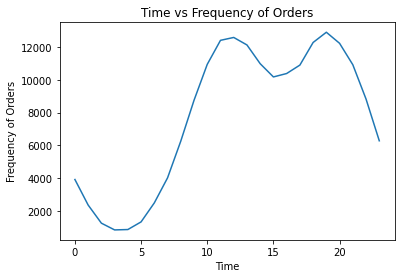

In [20]:
time_freq.plot()
plt.xlabel('Time')
plt.ylabel('Frequency of Orders')
plt.title('Time vs Frequency of Orders')

#### Question 4: What product sold the most? What might be the reason?
###### Conclusion: The prices of the products such as Batteries , Cables and headphones were comparatively less than others 

In [33]:
prices = new_df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

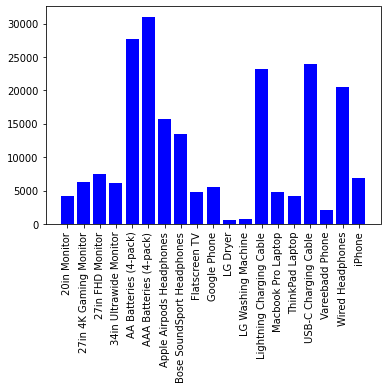

In [37]:
product_group = new_df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered, color='Blue')
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

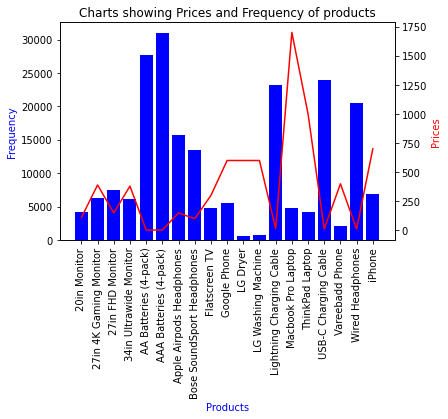

In [56]:
fig, ax1 = plt.subplots()

# Plot the bar graph
ax1.bar(keys, quantity_ordered, color='Blue')
ax1.set_ylabel('Frequency', color='Blue')
plt.xticks(keys,rotation='vertical' , size=10)

# Create a second y-axis for the line graph
ax2 = ax1.twinx()

# Plot the line graph
ax2.plot(keys, prices, color='Red')
ax2.set_ylabel('Prices', color='Red')

# Set labels and title
ax1.set_xlabel('Products',color='Blue')
ax1.set_title('Charts showing Prices and Frequency of products')



# Show the plot
plt.show()